# Criando a tabela de Alunos

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json")

In [3]:
nomes_m = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json")

In [4]:
print('Quantidade de nomes: ' + str(len(nomes_f)+len(nomes_m)))

Quantidade de nomes: 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
8,LUIZ
72,GILBERTO
154,NICOLE
180,LIDIA
72,CAROLINE


# Criando os IDs para Alunos

In [7]:
import numpy as np

In [8]:
np.random.seed(123)

In [9]:
total_alunos = len(nomes_f)+len(nomes_m)
total_alunos

400

In [10]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@escolapython.com.br', '@escolapython.edu']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@escolapython.com.br,severino@escolapython.com.br
0,JOSE,331,@escolapython.edu,jose@escolapython.edu
179,IAGO,340,@escolapython.com.br,iago@escolapython.com.br
10,SANDRA,174,@escolapython.com.br,sandra@escolapython.com.br
171,TERESINHA,45,@escolapython.com.br,teresinha@escolapython.com.br


#Criando a tabela Cursos

In [14]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import html5lib

In [16]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [17]:
cursos = cursos[0]

In [18]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


#Criando os IDs para Cursos

In [19]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [20]:
cursos['id'] = cursos.index + 1

In [21]:
cursos = cursos.set_index('id')

#Matriculando os Alunos nos Cursos

In [22]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@escolapython.com.br,arthur@escolapython.com.br
57,DAIANE,303,@escolapython.edu,daiane@escolapython.edu
85,HELENA,221,@escolapython.com.br,helena@escolapython.com.br
183,IRACI,8,@escolapython.com.br,iraci@escolapython.com.br
189,DALVA,137,@escolapython.com.br,dalva@escolapython.com.br


In [23]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [24]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@escolapython.com.br,milena@escolapython.com.br,2
183,IRACI,8,@escolapython.com.br,iraci@escolapython.com.br,1
10,LUIS,125,@escolapython.com.br,luis@escolapython.com.br,2
139,OSMAR,71,@escolapython.com.br,osmar@escolapython.com.br,2
40,SERGIO,139,@escolapython.edu,sergio@escolapython.edu,2


In [25]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [26]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


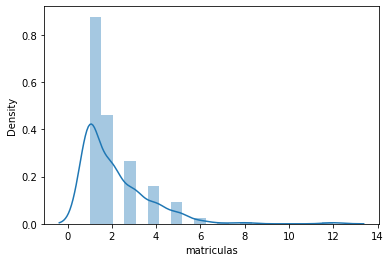

In [27]:
sns.distplot(nomes.matriculas)

In [28]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

# Selecionando cursos para cada um dos alunos

In [29]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/sum(x)

In [30]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [31]:
matriculas_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_alunos'})

# Saída em diferentes formatos

In [32]:
matriculas_curso.to_csv('matriculas_por_curso.csv', index=False)

In [33]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_alunos,nome_do_curso
0,24,Lógica de programação
1,52,Java para Web
2,54,C# para Web
3,51,Ruby on Rails
4,3,Cursos de Python
5,32,PHP com MySql
6,56,.NET para web
7,42,Novas integrações com Java
8,60,TDD com Java
9,68,Código limpo com C#


In [34]:
matriculas_json = matriculas_curso.to_json()

In [35]:
matriculas_json

'{"quantidade_alunos":{"1":24,"2":52,"3":54,"4":51,"5":3,"6":32,"7":56,"8":42,"9":60,"10":68,"11":78,"12":21,"13":21,"14":18,"15":57,"16":24,"17":71,"18":60,"19":6,"20":56},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [36]:
matriculas_html = matriculas_curso.to_html()

In [37]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>42</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>
    

# Criando o banco SQL

In [38]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from sqlalchemy import create_engine, MetaData, Table, inspect 

In [40]:
engine = create_engine('sqlite:///:memory:')
type(engine)

sqlalchemy.engine.base.Engine

In [41]:
matriculas_curso.to_sql('matriculas', engine)

In [42]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas']


# Buscando do banco SQL

In [43]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [44]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,5,3,Cursos de Python
1,14,18,Desenvolvendo jogos
2,19,6,Boas práticas em Java


In [45]:
alunos_por_curso = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [46]:
cursos_com_mais_alunos = alunos_por_curso.query('quantidade_alunos > 80')

# Escrevendo no Banco de Dados

In [47]:
cursos_com_mais_alunos.to_sql('cursos_com_mais_alunos', con=engine)

In [48]:
print(inspector.get_table_names())

['matriculas']


# Nomes dos alunos(as) da próxima turma

In [49]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
296,DANIELA
27,RAFAELA
246,LAURA
96,CAROLINA
285,VANIA
135,MIRIAN
353,JENIFER
67,PEDRO
311,ANDRE


In [50]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [51]:
nome_curso = nome_curso.nome_do_curso    
nome_curso

'Estatística básica'

In [52]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
296,DANIELA
27,RAFAELA
246,LAURA
96,CAROLINA
285,VANIA
135,MIRIAN
353,JENIFER
67,PEDRO
311,ANDRE


In [55]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
290,ROBSON
130,RUAN
152,SEBASTIAO
336,RICARDO
311,ANDRE
